# Principles of Data Science

### Lecture 9: Estimates

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Estimates

- Today's lecture covers estimates

- Learning objectives:
    - Understand what estimators and estimates are
    - Be able to discuss, compute and interpret the consistency, bias and efficiency of estimators
    - Be able to compute estimates for the mean and variance of a samples (as well as estimates of the variance of these estimates)

## Recap

In previous lectures we have covered:
 - properties of distributions
 - some common probability distributions
 - estimating the mean and variance of a dataset
 
Today we will formalise what we mean by estimates

## What is an estimate?

- An estimate is a measurement of some quantity based on observations in data
- We will label estimates with a "hat", e.g. $\hat{\theta}$ is an estimate of $\theta$

<font color="blue">**Frequentist:**</font>
- True values of parameters are fixed
- A **point estimate** is an estimate of the value itself
- An **interval** is an estimated range of values which contains the true value at some confidence level

<font color="blue">**Bayesian:**</font>
- Parameters are themselves random variables
- We can infer the probability distribution (posterior)
- Can quote a value and an interval from the probability distribution

## How do we produce estimates?

- Need some function, algorithm or procedure which produces an *estimate* from our observations
- This is known as an *estimator*
- The numerical value the *estimator* produces is the *estimate*
- An estimator can be almost anything you like
    - *e.g.* to estimate student height in this like class I could decide to compute the number of minutes each student has been alive and divide it by $\pi$
- This clearly produces a poor estimate so first we should quantity some properties of estimates that we would like to fulfil

## Consistency

- An *estimator* is <font color="blue">*consistent*</font> if the estimate it produces tends to the true value as the data size increases

- <font color="green">Hand written notes in lectures</font>

- We want to have <font color="blue">*consistent*</font> estimators

## Bias

- An estimator is <font color="blue">*unbiased*</font> if the expectation value of the estimate equals the true value
- <font color="green">Hand written notes in lectures</font>
- Having <font color="blue">*unbiased*</font> is desirable (although often managable) 
- It is preferable to have <font color="blue">*consistent*</font> estimators over <font color="blue">*biased*</font> estimators

## Consistency and bias

<img src="plots/consistency_bias.png" alt="drawing" width="1000">

## Efficiency

- Efficiency relates to the variance of the estimate $V(\hat{\theta})$
- Our estimate $\hat{\theta}$ will incur statistical fluctuations from the data we have
    - leads to a variance of the estimate
- An <font color="blue">*efficient*</font> estimate is one that minimises this variance

## Bias-variance trade off

- You may have seen this before in discussion of accuracy *vs.* precision
- Have to make a judgement on whether I keep an uncertainty in the *statistical* uncertainty or the *systematic* uncertainty
    - Which order of polynomial should I fit with?


4.691999999999999


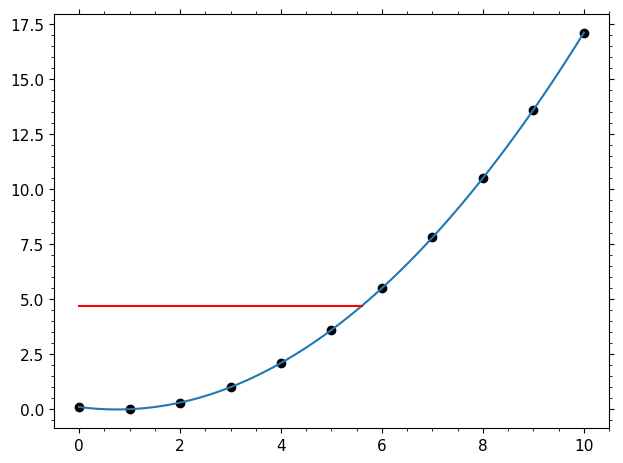

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

x = np.arange(0,11,1)

def true_func(x):
    return 0.2*x**2 - 0.3*x + 0.1

plt.scatter(x, true_func(x), c='k' )

xp = np.linspace(0,10,100)
plt.plot( xp, true_func(xp) )

# true value we want to estimate is func value at x=5.6
tx = 5.6
ty = true_func(tx)
print(ty)
plt.plot([0,tx],[ty,ty], 'r-')

    

In [2]:
# write a func to compute polynomials return by np.polyfit
def pfunc(x, *pars):
    ps = np.flip(pars)
    res = np.zeros_like(x)
    for i, p in enumerate(ps):
        res += p*x**i
    return res

nsamps = 2000

# run some pseudo-experiments
results = []
for i in range(nsamps):
    
    # add noise to yvals
    y = true_func(x) + np.random.normal(0, 1, size=x.shape)
    
    # fit with p1, p2 and p6
    p1 = np.polyfit(x, y, deg=1)
    p2 = np.polyfit(x, y, deg=2)  
    p6 = np.polyfit(x, y, deg=6)
    
    # evaluate at the tx value
    y1 = pfunc(tx, *p1)
    y2 = pfunc(tx, *p2)
    y6 = pfunc(tx, *p6)
    
    results.append( [y1, y2, y6] )
    

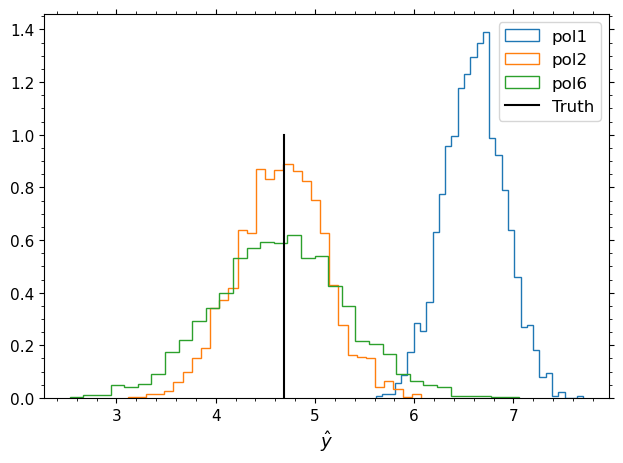

In [3]:
# evaluate the results
results = np.array( results )

plt.hist( results[:,0], bins='auto', density=True, histtype='step', label='pol1' )
plt.hist( results[:,1], bins='auto', density=True, histtype='step', label='pol2' )
plt.hist( results[:,2], bins='auto', density=True, histtype='step', label='pol6' )
plt.plot( [ty,ty], [0,1], 'k-', label='Truth')
plt.xlabel('$\hat{y}$')
plt.legend()


In [4]:
# Let's evaluate the estimates
for i, pol in enumerate(['pol1','pol2','pol6']):
    mean = np.mean( results[:,i] )
    sdev = np.std( results[:,i] )
    
    print(pol)
    print('  Mean:', mean)
    print('  Bias:', mean - ty)
    print('  sDev:', sdev)

pol1
  Mean: 6.604213166516198
  Bias: 1.9122131665161985
  sDev: 0.3008208267636082
pol2
  Mean: 4.658530979376607
  Bias: -0.033469020623392076
  sDev: 0.4389921524262365
pol6
  Mean: 4.648338179094802
  Bias: -0.043661820905197324
  sDev: 0.6553998974275861


## Precision-accuracy

- Relates to the classic precision *vs.* accuracy question
- Often has to be user defined

<img src="plots/accuracy_precision.png" alt="drawing" width="1000">

# <font color="darkred">*Musical interlude...*</font>

## Estimates of mean, variance and standard deviation

- <font color="green">*Hand written notes in lectures*</font>

<img src="plots/estimates.png" alt="drawing" width="600">

# End of Lecture 9

By the end of this lecture you should:
   - Understand what estimators and estimates are
   - Be able to discuss, compute and interpret the consistency, bias and efficiency of estimators
   - Be able to compute estimates for the mean and variance of a samples (as well as estimates of the variance of these estimates)